In [0]:
from zipfile import ZipFile
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline
# import the libraries as shown below



Using TensorFlow backend.


In [0]:
 zf=ZipFile("/content/drive/My Drive/Chest.zip")
 zf.extractall(path='Chest')
 zf.close()


In [0]:
s=32
IMAGE_SIZE = [224, 224]
trainGen=ImageDataGenerator(rescale=1./255,shear_range= 0.2,zoom_range= 0.2,horizontal_flip= True,rotation_range= 40,width_shift_range = 0.2,height_shift_range = 0.2)

In [0]:
train_set=trainGen.flow_from_directory('/content/Chest/chest_xray/train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [0]:
test_set=trainGen.flow_from_directory('/content/Chest/chest_xray/test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [0]:
val_set=trainGen.flow_from_directory('/content/Chest/chest_xray/val',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 16 images belonging to 2 classes.


In [0]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)





58892288/58889256 [==============================] - 2s 0us/step








In [0]:

for layer in vgg.layers:
    layer.trainable = False

In [0]:

folders = glob('/content/Chest/chest_xray/train/*')

In [0]:

x = Flatten()(vgg.output)

In [0]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [0]:

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [0]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_set,
  validation_data=val_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
163/163 [==============================] - 72s 439ms/step - loss: 0.1637 - acc: 0.9454 - val_loss: 0.1153 - val_acc: 0.9375
Epoch 2/5
163/163 [==============================] - 61s 376ms/step - loss: 0.0537 - acc: 0.9795 - val_loss: 0.2456 - val_acc: 0.8750
Epoch 3/5
163/163 [==============================] - 62s 379ms/step - loss: 0.0379 - acc: 0.9881 - val_loss: 0.1988 - val_acc: 0.8750
Epoch 4/5
163/163 [==============================] - 63s 385ms/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.2458 - val_acc: 0.8750
Epoch 5/5
163/163 [==============================] - 62s 381ms/step - loss: 0.0156 - acc: 0.9964 - val_loss: 0.2854 - val_acc: 0.8750


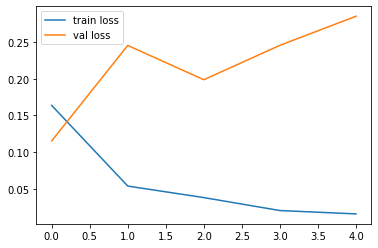

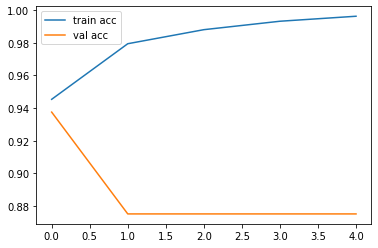

<Figure size 432x288 with 0 Axes>

In [0]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')